# This notebook has the following sections:
### Gap-filling
### Min and Max orfN flux limits
### Perturbations through orfN reaction
### PCA (annotated)
### orfN reaction flux vs biomass flux

In [1]:
# importing PA14 metabolic model of P. aeruginosa
import cobra
model = cobra.io.read_sbml_model("iSD1509MModel.xml")
model

Name,iSDXXXX
Memory address,10f387100
Number of metabolites,1642
Number of reactions,2021
Number of genes,1510
Number of groups,7
Objective expression,1.0*BIOMASS_PA14_v27M - 1.0*BIOMASS_PA14_v27M_reverse_0dc58
Compartments,"cytosol, extracellular space, periplasm"


In [2]:
default_bounds = {}
for rs in model.reactions:
    default_bounds[rs.id] = rs.bounds
    
# Making resetting model function
def reset_model(model, def_bounds, obj):
    for rs in model.reactions:
        rs.bounds = def_bounds[rs.id]
        
        rs.objective_coefficient
        
        if rs.id == obj:
            rs.objective_coefficient = 1

reset_model(model, default_bounds, 'BIOMASS_PA14_v27M')

## Gap-filling

In [3]:
# Adding sink to udcppf_c metabolite to try and get flux through orfN
mets = [model.metabolites.udcppf_c, model.metabolites.ump_c, 
        model.metabolites.uacfuc_c, model.metabolites.udcpp_c,
       model.metabolites.udcpdp_c, model.metabolites.uacman2naca_c,
       model.metabolites.PA_LPS_B_c]

model.add_boundary(mets[0], type='demand')

Reaction identifier,DM_udcppf_c
Name,Fuc2NAc-PP-Undecaprenyl demand
Memory address,0x146c4ab80
Stoichiometry,udcppf_c --> Fuc2NAc-PP-Undecaprenyl -->
GPR,
Lower bound,0
Upper bound,1000.0


## Maximizing fluc through orfN reaction

In [4]:
orfN_rxn = model.reactions.get_by_id('rxn13833')
print(orfN_rxn)

rxn13833: uacfuc_c + udcpp_c <=> udcppf_c + ump_c


In [5]:
# for rxns in orfN_rxn:
    #reset model
    # reset_model(model, default_bounds, 'BIOMASS_PA14_v27M')
    
    # Limit growth to minimum of 0.05
model.reactions.BIOMASS_PA14_v27M.bounds = 0.05, 1000

    # Make rxn of interest the objective function
model.reactions.BIOMASS_PA14_v27M.objective_coefficient = 0
orfN_rxn.objective_coefficient = 1
    
    # Optimize model to maximize flux through rxn
max_flux = model.optimize(objective_sense='maximize')
print(max_flux.objective_value)

max_flux_val = max_flux.objective_value

2.2355824291075597


In [6]:
# What is growth at max flux through orfN
growth_rxn_maxflux = model.reactions.get_by_id('BIOMASS_PA14_v27M')
print(growth_rxn_maxflux.summary())


BIOMASS_PA14_v27M
0.0002629250362 2fe2s_c + 0.0218082581186 PA_core_lipidA_c + 0.5114586280634 ala__L_c + 0.3347179859799 arg__L_c + 0.1163039750092 asn__L_c + 0.2337604590002 asp__L_c + 70.4958884983908 atp_c + 0.0072362236879 clpn160_c + 0.0038348089867 clpn161_c + 0.000348176308 clpn180_c + 0.0109468579074 clpn181_c + 0.0004942642694 clpn_pa_17_0_cyc_c + 0.000900875762 clpn_pa_19_0_cyc_c + 0.0001971967204 coa_c + 0.161115895419 ctp_c + 0.0442179279331 cys__L_c + 0.0127328513395 datp_c + 0.0250500903207 dctp_c + 0.0250500903207 dgtp_c + 0.0127328513395 dttp_c + 0.266984355176 gln__L_c + 0.1886815390631 glu__L_c + 0.367824371436 gly_c + 0.1815236055988 glycogen_c + 0.1610581353701 gtp_c + 66.0234962815776 h2o_c + 0.095542994587 his__L_c + 0.1833822575686 ile__L_c + 0.545109630509 leu__L_c + 0.1268098853154 lys__L_c + 0.0904990729257 met__L_c + 0.0002629250362 mlthf_c + 0.0440332489728 pe160_c + 0.0186791573555 pe161_c + 0.0019052207574 pe180_c + 0.0627923456608 pe181_c + 0.0012523828

## Minimizing flux through orfN reaction

In [7]:
# for rxns in reactions_murA:
    #reset model
    #reset_model(model, default_bounds, 'BIOMASS_PA14_v27M')
    
    # Limit growth to minimum of 0.05
model.reactions.BIOMASS_PA14_v27M.bounds = 0.05, 1000

    # Make rxn of interest the objective function
model.reactions.BIOMASS_PA14_v27M.objective_coefficient = 0
orfN_rxn.objective_coefficient = 1
    
    # Optimize model to minimize flux through rxn
min_flux = model.optimize(objective_sense='minimize')
print(min_flux.objective_value)
    
min_flux_val = min_flux.objective_value

0.0


In [8]:
# What is growth at min flux through MurA
growth_rxn_minflux = model.reactions.get_by_id('BIOMASS_PA14_v27M')
print(growth_rxn_minflux.summary())


BIOMASS_PA14_v27M
0.0002629250362 2fe2s_c + 0.0218082581186 PA_core_lipidA_c + 0.5114586280634 ala__L_c + 0.3347179859799 arg__L_c + 0.1163039750092 asn__L_c + 0.2337604590002 asp__L_c + 70.4958884983908 atp_c + 0.0072362236879 clpn160_c + 0.0038348089867 clpn161_c + 0.000348176308 clpn180_c + 0.0109468579074 clpn181_c + 0.0004942642694 clpn_pa_17_0_cyc_c + 0.000900875762 clpn_pa_19_0_cyc_c + 0.0001971967204 coa_c + 0.161115895419 ctp_c + 0.0442179279331 cys__L_c + 0.0127328513395 datp_c + 0.0250500903207 dctp_c + 0.0250500903207 dgtp_c + 0.0127328513395 dttp_c + 0.266984355176 gln__L_c + 0.1886815390631 glu__L_c + 0.367824371436 gly_c + 0.1815236055988 glycogen_c + 0.1610581353701 gtp_c + 66.0234962815776 h2o_c + 0.095542994587 his__L_c + 0.1833822575686 ile__L_c + 0.545109630509 leu__L_c + 0.1268098853154 lys__L_c + 0.0904990729257 met__L_c + 0.0002629250362 mlthf_c + 0.0440332489728 pe160_c + 0.0186791573555 pe161_c + 0.0019052207574 pe180_c + 0.0627923456608 pe181_c + 0.0012523828

In [9]:
# State newly determined bounds for reaction
min_flux_val, max_flux_val

(0.0, 2.2355824291075597)

## Perturbations through orfN reaction

In [10]:
import numpy as np
import pandas as pd
my_flux_vals = np.linspace(min_flux_val, max_flux_val, num=400)
my_flux_vals

array([0.        , 0.00560296, 0.01120593, 0.01680889, 0.02241185,
       0.02801482, 0.03361778, 0.03922074, 0.04482371, 0.05042667,
       0.05602963, 0.0616326 , 0.06723556, 0.07283853, 0.07844149,
       0.08404445, 0.08964742, 0.09525038, 0.10085334, 0.10645631,
       0.11205927, 0.11766223, 0.1232652 , 0.12886816, 0.13447112,
       0.14007409, 0.14567705, 0.15128001, 0.15688298, 0.16248594,
       0.1680889 , 0.17369187, 0.17929483, 0.18489779, 0.19050076,
       0.19610372, 0.20170669, 0.20730965, 0.21291261, 0.21851558,
       0.22411854, 0.2297215 , 0.23532447, 0.24092743, 0.24653039,
       0.25213336, 0.25773632, 0.26333928, 0.26894225, 0.27454521,
       0.28014817, 0.28575114, 0.2913541 , 0.29695706, 0.30256003,
       0.30816299, 0.31376595, 0.31936892, 0.32497188, 0.33057485,
       0.33617781, 0.34178077, 0.34738374, 0.3529867 , 0.35858966,
       0.36419263, 0.36979559, 0.37539855, 0.38100152, 0.38660448,
       0.39220744, 0.39781041, 0.40341337, 0.40901633, 0.41461

In [11]:
# reset objective function to biomass
model.reactions.BIOMASS_PA14_v27M.objective_coefficient = 1
model.reactions.rxn13833.objective_coefficient = 0
# Checking objective function
for reactions in model.reactions:
    if reactions.objective_coefficient == 1:
        print(f'The objective function is: {reactions.id}')

The objective function is: BIOMASS_PA14_v27M


In [12]:
orfN_rxn.bounds = 1.11498973, 1.11498973

# Optimize model to maximize flux through biomass rxn
# with specific flux through orfN
solution = model.optimize(objective_sense='maximize')
print(solution.objective_value)

0.8553750362407132


In [13]:
# Model flux vector corresponding with this solution
solution.fluxes

solution_df = solution.to_frame()
solution_df = solution_df[solution_df['fluxes'] != 0]
solution_df

,fluxes,reduced_costs
3HAACOAT60,-0.471246,4.531955e-17
3HAD100,0.433937,6.938894e-18
3HAD120,0.209698,0.000000e+00
3HAD121,0.224239,0.000000e+00
3HAD140,0.135082,0.000000e+00
...,...,...
rJB00277,1.114990,-1.401616e-17
rxn00295,1.114990,0.000000e+00
EX_itacon_e,22.432971,0.000000e+00
BIOMASS_PA14_v27M,0.855375,-1.931788e-14


In [14]:
orfN_rxn.bounds = 0, 0

# Optimize model to maximize flux through biomass rxn
# with specific flux through orfN
solution = model.optimize(objective_sense='maximize')
print(solution.objective_value)

1.5908505726730051


In [15]:
orfN_rxn.bounds = 2.23558243, 2.23558243

# Optimize model to maximize flux through biomass rxn
# with specific flux through orfN
solution = model.optimize(objective_sense='maximize')
print(solution.objective_value)

0.04999999934976328


In [16]:
# Create empty list to input rows for each orfN flux
row_list = []
# Loop through orfN fluxes to get corresponding network fluxes
for flux in my_flux_vals:
    # Reset model
    # reset_model(model, default_bounds, 'BIOMASS_PA14_v27M')
    # Set orfN flux bounds
    orfN_rxn.bounds = flux, flux
    solution = model.optimize(objective_sense='maximize')
    row_list.append(solution.fluxes)

matrix_df = pd.DataFrame(row_list)
matrix_df

,1PPDCRc,2AGPE140tipp,2AGPE141tipp,2AGPG140tipp,2AGPG141tipp,2DHGLCK,2DHGLCNkt_tpp,2HH24DDH1,2MAHMP,3_4DHBZ1t_pp,...,BIOMASS_PA14_v27M,BIOMASS_PA14_v27M_ANA,PYOO2exNET,AHGDx,SHGO,ACTD2_SS,23DHBSpp,ACPS1,ACPpds,DM_udcppf_c
fluxes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.590851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
fluxes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.587432,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005603
fluxes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.584014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011206
fluxes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.580596,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.016809
fluxes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.577178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fluxes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.066332,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.213171
fluxes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.062249,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.218774
fluxes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.058166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.224377
fluxes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.054083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.229979


In [17]:
print(matrix_df['rxn13833'])

fluxes    0.000000
fluxes    0.005603
fluxes    0.011206
fluxes    0.016809
fluxes    0.022412
            ...   
fluxes    2.213171
fluxes    2.218774
fluxes    2.224377
fluxes    2.229979
fluxes    2.235582
Name: rxn13833, Length: 400, dtype: float64


In [18]:
matrix_df = matrix_df.drop('rxn13833', axis=1)
matrix_df
matrix_df.shape

(400, 2021)

In [19]:
print(matrix_df['rxn13833'])

KeyError: 'rxn13833'

In [20]:
# Adding column of orfN flux values to dataframe for annotation
orfN_flux_values = my_flux_vals.tolist()
orfN_flux_values

[0.0,
 0.00560296348147258,
 0.01120592696294516,
 0.016808890444417742,
 0.02241185392589032,
 0.0280148174073629,
 0.033617780888835484,
 0.039220744370308064,
 0.04482370785178064,
 0.05042667133325322,
 0.0560296348147258,
 0.06163259829619838,
 0.06723556177767097,
 0.07283852525914354,
 0.07844148874061613,
 0.0840444522220887,
 0.08964741570356129,
 0.09525037918503387,
 0.10085334266650645,
 0.10645630614797903,
 0.1120592696294516,
 0.11766223311092419,
 0.12326519659239676,
 0.12886816007386934,
 0.13447112355534194,
 0.1400740870368145,
 0.14567705051828708,
 0.15128001399975968,
 0.15688297748123226,
 0.16248594096270483,
 0.1680889044441774,
 0.17369186792565,
 0.17929483140712257,
 0.18489779488859515,
 0.19050075837006775,
 0.19610372185154032,
 0.2017066853330129,
 0.20730964881448546,
 0.21291261229595806,
 0.21851557577743064,
 0.2241185392589032,
 0.2297215027403758,
 0.23532446622184838,
 0.24092742970332096,
 0.24653039318479353,
 0.25213335666626613,
 0.2577363201

In [21]:
matrix_df["orfN Flux Values"] = orfN_flux_values

In [22]:
matrix_df.shape

(400, 2022)

## PCA

In [23]:
# Importing PCA class from sklearn
from sklearn.decomposition import PCA

# Fit PCA model to matrix
pca = PCA()
pca.fit(matrix_df)

PCA()

In [24]:
# Looking at the principal components formed
components = pca.components_
components

array([[ 2.24728296e-16, -3.53544670e-17,  4.25210540e-19, ...,
         0.00000000e+00,  9.23629729e-03,  9.23629729e-03],
       [ 1.53859300e-17,  4.42290959e-17,  8.97854924e-18, ...,
        -0.00000000e+00, -4.66631831e-03, -4.66631831e-03],
       [-3.71074758e-16,  4.37170645e-17,  1.24954300e-16, ...,
         0.00000000e+00,  5.29930813e-03,  5.29930813e-03],
       ...,
       [ 7.22417437e-05, -1.02792781e-03,  3.04725211e-04, ...,
         0.00000000e+00, -9.61806098e-03,  6.56479185e-02],
       [-1.37630681e-01,  7.44326927e-02,  8.45643768e-02, ...,
         0.00000000e+00, -1.27128458e-03, -3.93315436e-04],
       [-4.53337120e-02,  1.15140806e-02, -1.60651719e-01, ...,
         0.00000000e+00,  6.84132707e-03, -6.19317867e-03]])

In [25]:
# Explained variance ratio of each principal component
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[9.47482580e-01 4.43009754e-02 6.04406024e-03 1.69005256e-03
 4.01004757e-04 4.31769640e-05 3.63085792e-05 1.79719767e-06
 4.38280698e-08 7.95851991e-10 5.79323703e-28 1.75808010e-29
 8.40425415e-30 4.83208744e-30 1.08187618e-30 6.46736004e-31
 2.50642671e-31 1.04580726e-31 1.02476022e-31 6.74395775e-32
 2.99365687e-32 2.91835655e-32 1.62032639e-32 1.29929258e-32
 8.97899179e-33 8.97899179e-33 8.97899179e-33 8.97899179e-33
 8.97899179e-33 8.97899179e-33 8.97899179e-33 8.97899179e-33
 8.97899179e-33 8.97899179e-33 8.97899179e-33 8.97899179e-33
 8.97899179e-33 8.97899179e-33 8.97899179e-33 8.97899179e-33
 8.97899179e-33 8.97899179e-33 8.97899179e-33 8.97899179e-33
 8.97899179e-33 8.97899179e-33 8.97899179e-33 8.97899179e-33
 8.97899179e-33 8.97899179e-33 8.97899179e-33 8.97899179e-33
 8.97899179e-33 8.97899179e-33 8.97899179e-33 8.97899179e-33
 8.97899179e-33 8.97899179e-33 8.97899179e-33 8.97899179e-33
 8.97899179e-33 8.97899179e-33 8.97899179e-33 8.97899179e-33
 8.97899179e-33 8.978991

In [26]:
# Keeping only first 2 principial components
pca_2 = PCA(n_components=2)
pca_2.fit(matrix_df)
print(pca_2.explained_variance_ratio_)

[0.94748258 0.04430098]


In [27]:
# Transform original matrix to principal component space
pca_matrix = pca_2.transform(matrix_df)
print(pca_matrix)
pca_matrix.shape

[[-9.73474977e+01  1.62059582e+01]
 [-9.71075388e+01  1.61679928e+01]
 [-9.68675799e+01  1.61300273e+01]
 [-9.66276210e+01  1.60920619e+01]
 [-9.63876621e+01  1.60540964e+01]
 [-9.61477032e+01  1.60161310e+01]
 [-9.59077443e+01  1.59781656e+01]
 [-9.56677854e+01  1.59402001e+01]
 [-9.54278264e+01  1.59022347e+01]
 [-9.51878675e+01  1.58642692e+01]
 [-9.49479086e+01  1.58263038e+01]
 [-9.47079497e+01  1.57883384e+01]
 [-9.44679908e+01  1.57503729e+01]
 [-9.42280319e+01  1.57124075e+01]
 [-9.39880730e+01  1.56744420e+01]
 [-9.37481141e+01  1.56364766e+01]
 [-9.35081551e+01  1.55985112e+01]
 [-9.32681962e+01  1.55605457e+01]
 [-9.30282373e+01  1.55225803e+01]
 [-9.27882784e+01  1.54846149e+01]
 [-9.25483195e+01  1.54466494e+01]
 [-9.23083606e+01  1.54086840e+01]
 [-9.20684017e+01  1.53707185e+01]
 [-9.18284428e+01  1.53327531e+01]
 [-9.15884839e+01  1.52947877e+01]
 [-9.13485249e+01  1.52568222e+01]
 [-9.11085660e+01  1.52188568e+01]
 [-9.08686071e+01  1.51808913e+01]
 [-9.06286482e+01  1

(400, 2)

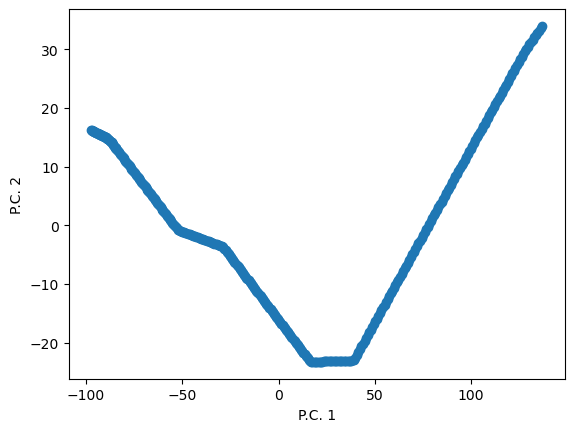

In [28]:
import matplotlib.pyplot as plt

# Graph first two principal components
x = pca_matrix[:, 0]
y = pca_matrix[:, 1]
plt.scatter(x,y)
plt.xlabel("P.C. 1")
plt.ylabel("P.C. 2")
plt.show()

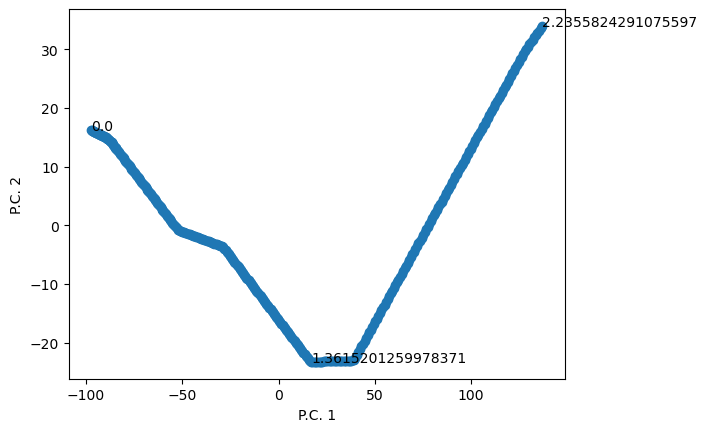

In [30]:
# Plot the first two principal components
plt.scatter(pca_components[:, 0], pca_components[:, 1])

# Index for first and last points
annotate_index = [0, -1]

# Annotate first and last points
for i in annotate_index:
    x, y = pca_components[i, :]
    plt.annotate(orfN_flux_values[i], (x, y))
    
# Index for min y value
min_y_value = pca_components[:, 1].argmin()

# Annotate point with min y value
x, y = pca_components[min_y_value, :]
plt.annotate(orfN_flux_values[min_y_value], (x, y))

plt.xlabel("P.C. 1")
plt.ylabel("P.C. 2")
plt.show()

In [31]:
# To see if P.C. 2 is related to biomass production
orfN_rxn.bounds = 0, 0

# Optimize model to maximize flux through biomass rxn
# with specific flux through orfN
solution = model.optimize(objective_sense='maximize')
print(solution.objective_value)

1.5908505726729747


In [32]:
# To see if P.C. 2 is related to biomass production
orfN_rxn.bounds = 1.36152013, 1.36152013

# Optimize model to maximize flux through biomass rxn
# with specific flux through orfN
solution = model.optimize(objective_sense='maximize')
print(solution.objective_value)

0.6815716917698045


In [33]:
# To see if P.C. 2 is related to biomass production
orfN_rxn.bounds = 2.2355824291075597, 2.2355824291075597

# Optimize model to maximize flux through biomass rxn
# with specific flux through orfN
solution = model.optimize(objective_sense='maximize')
print(solution.objective_value)

0.050000000000026225


### Therefore, unlikely P.C. 2 is related to biomass growth

## Graph orfN Fluxes vs. Resulting Biomass Function

In [34]:
orfN_flux_values

[0.0,
 0.00560296348147258,
 0.01120592696294516,
 0.016808890444417742,
 0.02241185392589032,
 0.0280148174073629,
 0.033617780888835484,
 0.039220744370308064,
 0.04482370785178064,
 0.05042667133325322,
 0.0560296348147258,
 0.06163259829619838,
 0.06723556177767097,
 0.07283852525914354,
 0.07844148874061613,
 0.0840444522220887,
 0.08964741570356129,
 0.09525037918503387,
 0.10085334266650645,
 0.10645630614797903,
 0.1120592696294516,
 0.11766223311092419,
 0.12326519659239676,
 0.12886816007386934,
 0.13447112355534194,
 0.1400740870368145,
 0.14567705051828708,
 0.15128001399975968,
 0.15688297748123226,
 0.16248594096270483,
 0.1680889044441774,
 0.17369186792565,
 0.17929483140712257,
 0.18489779488859515,
 0.19050075837006775,
 0.19610372185154032,
 0.2017066853330129,
 0.20730964881448546,
 0.21291261229595806,
 0.21851557577743064,
 0.2241185392589032,
 0.2297215027403758,
 0.23532446622184838,
 0.24092742970332096,
 0.24653039318479353,
 0.25213335666626613,
 0.2577363201

In [35]:
orfN_growth_df = pd.DataFrame()
orfN_growth_df["orfN Fluxes"] = orfN_flux_values
orfN_growth_df

,orfN Fluxes
0,0.000000
1,0.005603
2,0.011206
3,0.016809
4,0.022412
...,...
395,2.213171
396,2.218774
397,2.224377
398,2.229979


In [36]:
# Create empty list to input growth values for each orfN flux
growth_list = []
# Loop through orfN fluxes to get corresponding growth values
for flux in orfN_flux_values:
    # Reset model
    # reset_model(model, default_bounds, 'BIOMASS_PA14_v27M')
    # Set orfN flux bounds
    orfN_rxn.bounds = flux, flux
    solution = model.optimize(objective_sense='maximize')
    growth_list.append(solution.objective_value)
growth_list

[1.5908505726730335,
 1.5874323560049195,
 1.5840141393368001,
 1.5805959226687087,
 1.5771777060006116,
 1.5737594893324862,
 1.5703412726644101,
 1.5669230559962888,
 1.563504839328196,
 1.5600866226601038,
 1.5566684059919784,
 1.5532501893238715,
 1.5498319726557594,
 1.546413755987653,
 1.5429955393195602,
 1.5395773226514424,
 1.5361591059833686,
 1.532740889315236,
 1.5293226726471474,
 1.5259044559790442,
 1.522486239310939,
 1.5190680226428463,
 1.5156498059747587,
 1.5122315893066334,
 1.5088133726385213,
 1.5053951559704428,
 1.501976939302315,
 1.4985587226342172,
 1.4951405059661265,
 1.4917222892980049,
 1.4883040726298995,
 1.4848858559618034,
 1.481467639293702,
 1.4780494226255791,
 1.4746312059575155,
 1.471212989289405,
 1.467794772621307,
 1.4643765559531987,
 1.460958339285096,
 1.457540122617009,
 1.4541219059488981,
 1.4507036892807696,
 1.4472854726126898,
 1.443867255944589,
 1.440449039276483,
 1.4370308226083692,
 1.4336126059402763,
 1.4301943892722095,
 1.4

In [37]:
# Add growth list to dataframe
orfN_growth_df["Growth Values"] = growth_list
orfN_growth_df

,orfN Fluxes,Growth Values
0,0.000000,1.590851
1,0.005603,1.587432
2,0.011206,1.584014
3,0.016809,1.580596
4,0.022412,1.577178
...,...,...
395,2.213171,0.066332
396,2.218774,0.062249
397,2.224377,0.058166
398,2.229979,0.054083


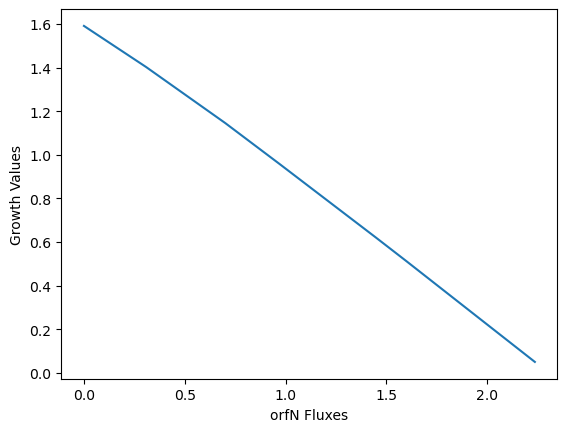

In [38]:
plt.plot(orfN_growth_df["orfN Fluxes"], orfN_growth_df["Growth Values"])
plt.xlabel("orfN Fluxes")
plt.ylabel("Growth Values")
plt.show()